In [ ]:
# Project 3 notebook

# Ideas:
# Compare the medals per doper ratio of different countries
# Of the countries who have never doped, who has the most medals?
# ...still need to figure out how many athletes each country has sent to Olympics

# https://olympics.com/en/

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

response = requests.get('https://en.wikipedia.org/wiki/Doping_at_the_Olympic_Games')

if response.status_code == 200:
    soup = BeautifulSoup(response.text)
    country_dopes = {}
    
    # This block sums up all mentions of each country in the "country" column of the doping scandal tables.
    # Added country names only include the part of the text in the column that is in a hyperlink
    # (e.g. "Russia (RUS)" gets added as "Russia")
    tables = soup.find_all('table', {'class': 'wikitable'})
    for table in tables:
        rows = table.find_all('tr')
        for row in rows:
            cells = row.find_all('td')
            if cells:
                country_cell = cells[1]
                country_hyperlink = country_cell.find('a')
                if country_hyperlink:
                    country_name = country_hyperlink.get_text(strip=True)
                    country_dopes[country_name] = country_dopes.get(country_name, 0) + 1
else:
    print("Failed to retrieve the webpage.")

# Assemble scraped data into dataframe
pd.set_option('display.max_rows', None)
country_dope_counts = pd.DataFrame(list(country_dopes.items()), columns=['Country', 'times_caught_doping'])
country_dope_counts


,Country,times_caught_doping
0,Sweden,5
1,Mongolia,4
2,Puerto Rico,2
3,United States,18
4,Netherlands,1
5,Spain,8
6,Austria,13
7,Iran,2
8,Bulgaria,10
9,Monaco,1


In [76]:
response_medals = requests.get('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table')

if response_medals.status_code == 200:
    medal_soup = BeautifulSoup(response_medals.text)
    country_medals = {}

    main_medal_table = medal_soup.find_all('table', {'class': 'wikitable'})[12]
    medal_rows = main_medal_table.find_all('tr')
    for medal_row in medal_rows:
        medal_cells = medal_row.find_all(['td', 'th'])
        if medal_cells:
            country_cell_for_medals = medal_cells[1]
            country_hyperlink = country_cell_for_medals.find('a')
            if country_hyperlink:
                country_name_for_medals = country_hyperlink.get_text(strip=True)
                country_medals[country_name_for_medals] = {
                    'Gold': int(medal_cells[2].text),
                    'Silver': int(medal_cells[3].text),
                    'Bronze': int(medal_cells[4].text),
                    'Total': int(medal_cells[5].text)
                }
else:
    print("Failed to retrieve the webpage.")

# Merge doping data with medal data
country_medals_df = pd.DataFrame(country_medals).T.reset_index()
country_medals_df.columns = ['Country', 'Gold', 'Silver', 'Bronze', 'Total']
all_data = pd.merge(country_dope_counts, country_medals_df, on='Country', how='outer')
all_data['medals_per_doper'] = all_data['Total'] / all_data['times_caught_doping']
all_data = all_data.sort_values(by='Total', ascending=False).reset_index()
display(all_data)


,index,Country,times_caught_doping,Gold,Silver,Bronze,Total,medals_per_doper
0,120,United States,18.0,1174.0,952.0,833.0,2959.0,164.388889
1,106,Soviet Union,1.0,473.0,376.0,355.0,1204.0,1204.000000
2,45,Great Britain,6.0,296.0,323.0,331.0,950.0,158.333333
3,43,Germany,5.0,305.0,305.0,312.0,922.0,184.400000
4,41,France,1.0,264.0,293.0,332.0,889.0,889.000000
5,57,Italy,6.0,259.0,231.0,269.0,759.0,126.500000
6,23,China,6.0,285.0,231.0,197.0,713.0,118.833333
7,109,Sweden,5.0,212.0,228.0,239.0,679.0,135.800000
8,59,Japan,3.0,186.0,178.0,209.0,573.0,191.000000
9,83,Norway,3.0,209.0,186.0,173.0,568.0,189.333333


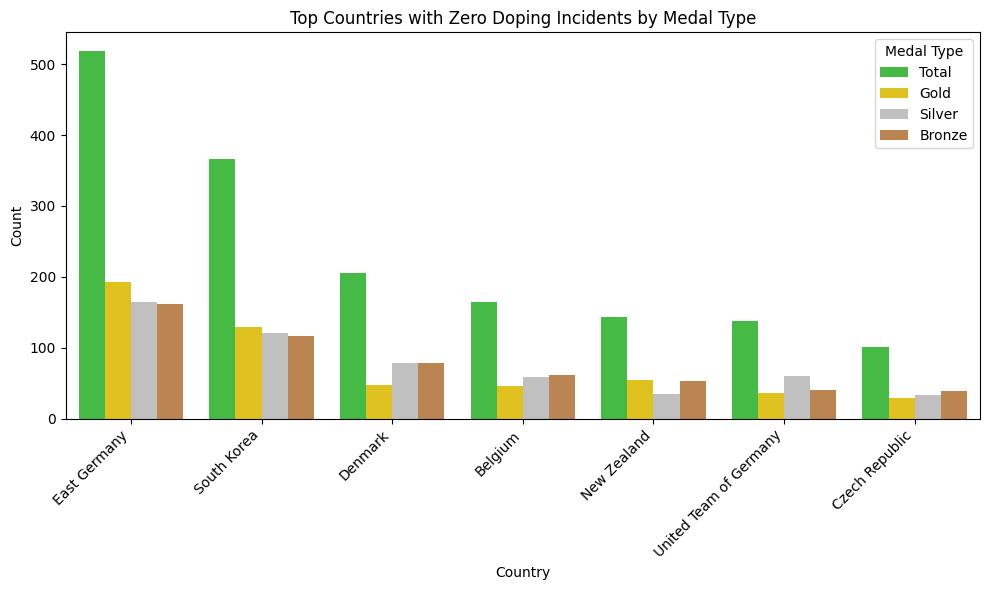

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

zero_dope_countries = all_data[all_data['times_caught_doping'].isna()]
#display(zero_dope_countries)

# Bar graph will have separate columns for each medal type
top_countries = zero_dope_countries.nlargest(7, 'Total')
columns_to_keep = ['Country', 'Total', 'Gold', 'Silver', 'Bronze']
top_countries_medals = top_countries[columns_to_keep]
melted_df = top_countries_medals.melt(id_vars='Country', var_name='Medal', value_name='Count')

# Create the bar plot
plt.figure(figsize=(10, 6))
medal_colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru', 'Total': 'limegreen'}
sns.barplot(x='Country', y='Count', hue='Medal', data=melted_df, palette=medal_colors)
plt.title('Top Countries with Zero Doping Incidents by Medal Type')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(title='Medal Type')
plt.show()


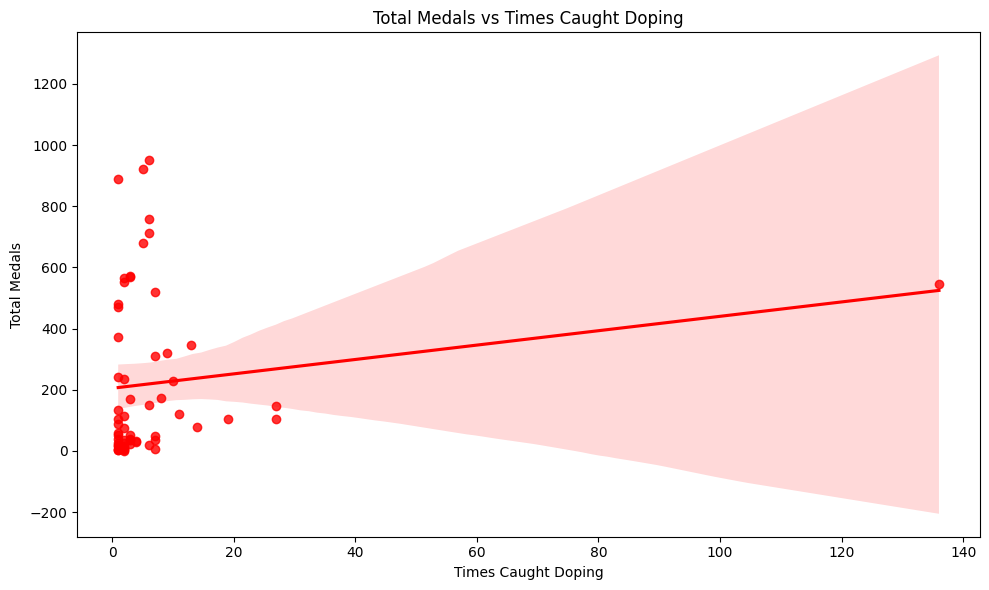

Pearson correlation coefficient: 0.1563213222398585
p-value: 0.22895183646883077


In [114]:
from scipy.stats import pearsonr

# This gets rid of non-dopers and also gets rid of non-medalists
dope_countries = all_data.dropna()

# Make scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='times_caught_doping', y='Total', data=dope_countries, color="red")
plt.title('Total Olympic Medals By Country vs Times Caught Doping')
plt.xlabel('Times Caught Doping')
plt.ylabel('Total Medals')
plt.tight_layout()
plt.show()

corr_coeff, p_value = pearsonr(dope_countries['times_caught_doping'], dope_countries['Total'])
print("p-value:", p_value)

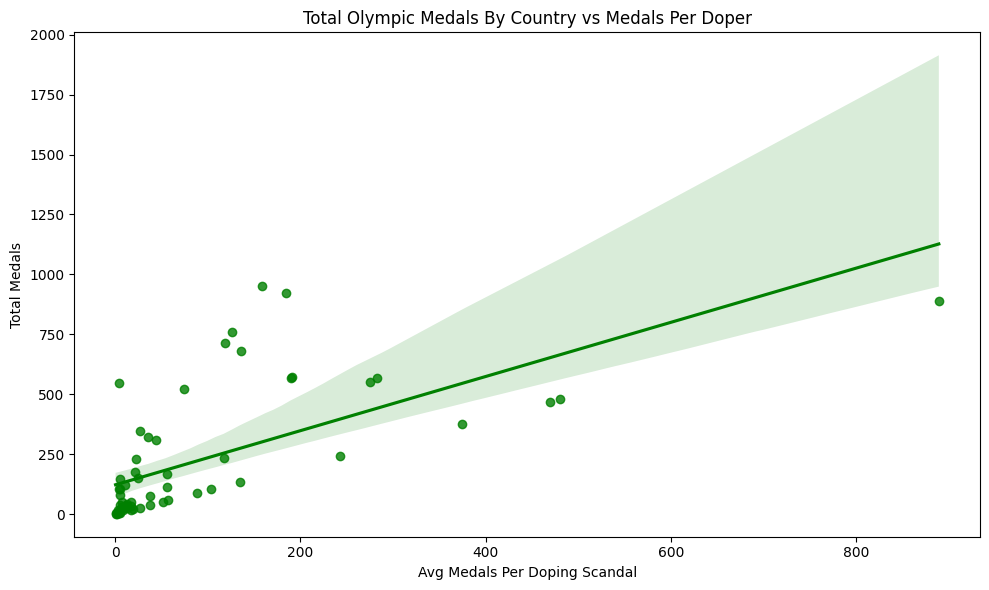

p-value: 2.0074340288130874e-08


In [116]:
# Make scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='medals_per_doper', y='Total', data=dope_countries, color="green")
plt.title('Total Olympic Medals By Country vs Medals Per Doper')
plt.xlabel('Avg Medals Per Doping Scandal')
plt.ylabel('Total Medals')
plt.tight_layout()
plt.show()

corr_coeff, p_value = pearsonr(dope_countries['medals_per_doper'], dope_countries['Total'])
print("p-value:", p_value)